# Project Title : Fraud Detection

In this fraud detection system, we have used the data set that contains record of swap credit card in shops and has data of merchants(shopkeepers) and customers.  

In this project, we have done
1. Loading Dataset
2. Cleaning Dataset
3. EDA (Expolatory Data Analysis)
4. Feature Engineering
5. Model Prediction
6. Model Evaluation (Using Machine Learning)

# Submitted By : Mahzeb Akhtar

# Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Importing Dataset

In [2]:
data = pd.read_csv("fraudTest.csv")

# Reading Dataset

Displaying the first 5 rows of the dataset

In [3]:
data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


# Accessing the column labels of the Dataset

In [4]:
data.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

# Generating Descriptive Statistics of Dataset's Numerical columns

In [5]:
data.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,555719.000000,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,277859.000000,4.178387e+17,69.392810,48842.628015,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380,0.003860
std,160422.401459,1.309837e+18,156.745941,26855.283328,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071,0.062008
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000
25%,138929.500000,1.800429e+14,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129,0.000000
50%,277859.000000,3.521417e+15,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204,0.000000
75%,416788.500000,4.635331e+15,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637,0.000000
max,555718.000000,4.992346e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,1.000000


# Generating Summary of Dataset
   The summary includes the number of non-null entries, the data type of each column, and memory usage. It is particularly useful for getting a quick overview of the structure and completeness of the data.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

# Generating Dimension of Dataset

It returns a tuple representing the number of rows and columns in the DataFrame.

In [7]:
data.shape

(555719, 23)

# Identifying and counting missing values in Dataset

In [8]:
data.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

# Fraud vs Non-Fraud Frequency Distribution

Text(0, 0.5, 'Frequency')

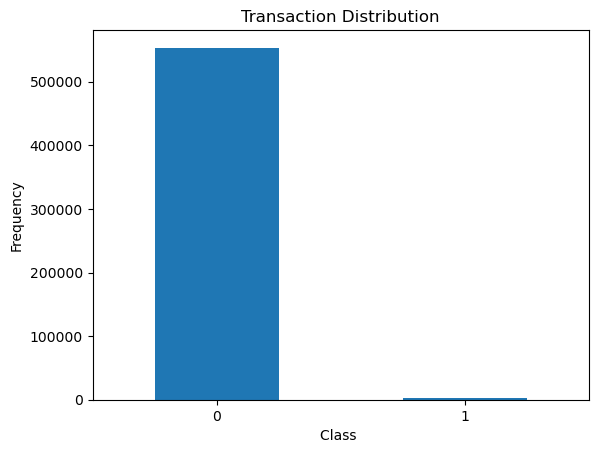

In [9]:
count_classes = pd.value_counts(data['is_fraud'], sort = True)
count_classes.plot(kind='bar', rot=0)
plt.title("Transaction Distribution")
plt.xlabel("Class ")
plt.ylabel("Frequency")

## 0 --> Normal Transaction


## 1 --> fraudulent transaction

In [10]:
fraud = data[data['is_fraud']==1]
normal = data[data['is_fraud']==0]

In [11]:
print(fraud.shape, normal.shape)

(2145, 23) (553574, 23)


In [12]:
fraud.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,2145.000000,2.145000e+03,2145.000000,2145.000000,2145.000000,2145.000000,2.145000e+03,2.145000e+03,2145.000000,2145.000000,2145.0
mean,242057.088112,3.854274e+17,528.356494,47862.900233,39.019971,-90.445556,6.452932e+04,1.379587e+09,39.018618,-90.465222,1.0
std,135455.280233,1.276313e+18,392.747594,26706.283776,5.076671,14.147521,2.192075e+05,4.546697e+06,5.093782,14.159252,0.0
min,1685.000000,6.048700e+10,1.780000,1257.000000,20.082700,-155.488000,2.300000e+01,1.371852e+09,19.161782,-156.480766,1.0
25%,131562.000000,3.056061e+13,214.510000,23937.000000,34.957200,-96.743000,1.131000e+03,1.375756e+09,35.017480,-96.697100,1.0
50%,245890.000000,2.358122e+15,371.940000,47987.000000,39.893600,-88.093500,2.870000e+03,1.379548e+09,39.744929,-88.040722,1.0
75%,346223.000000,4.335532e+15,907.770000,68031.000000,42.180800,-79.785600,1.233500e+04,1.383350e+09,42.208725,-79.909134,1.0
max,517571.000000,4.989848e+18,1320.920000,99921.000000,55.473200,-67.950300,1.577385e+06,1.387754e+09,56.214113,-66.960745,1.0


In [13]:
normal.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,553574.000000,5.535740e+05,553574.000000,553574.000000,553574.000000,553574.000000,5.535740e+05,5.535740e+05,553574.000000,553574.000000,553574.0
mean,277997.725990,4.179643e+17,67.614408,48846.424285,38.541406,-90.230495,8.831369e+04,1.380683e+09,38.540954,-90.230474,0.0
std,160496.162903,1.309964e+18,152.471931,26855.813540,5.061194,13.720111,3.006593e+05,5.203038e+06,5.095755,13.731399,0.0
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.0
25%,139011.250000,1.800429e+14,9.600000,26292.000000,34.668900,-96.798000,7.410000e+02,1.376031e+09,34.754055,-96.906402,0.0
50%,278009.500000,3.521417e+15,47.150000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380770e+09,39.374616,-87.443645,0.0
75%,417073.750000,4.642255e+15,82.620000,72042.000000,41.894800,-80.175200,1.968500e+04,1.385872e+09,41.953397,-80.265911,0.0
max,555718.000000,4.992346e+18,22768.110000,99783.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,0.0


# Removing some specific columns from Dataset

In [14]:
data.drop(columns=['Unnamed: 0','street','first','last','trans_num','unix_time'],inplace=True)

# Data Prepprocessing

### Change the data type for 'trans_date_trans_time"

Creating new columns related to the date and time information from an existing column trans_date_trans_time.

In [15]:
# Convert the trans_date_trans_time Column to Datetime Format
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'],format='%Y-%m-%d %H:%M:%S')
# Extract the Hour from the trans_date_trans_time Column
data['hour'] = data['trans_date_trans_time'].dt.hour
# Extract the Day Name from the trans_date_trans_time Column
data['day'] = data['trans_date_trans_time'].dt.day_name()
# Extract the Month from the trans_date_trans_time Column
data['month'] = data['trans_date_trans_time'].dt.month

### Removing the 'fraud_' from each merchant name

In [16]:
data['merchant'] = data['merchant'].apply(lambda x : x.replace('fraud_',''))
data[['merchant']].head()

,merchant
0,Kirlin and Sons
1,Sporer-Keebler
2,"Swaniawski, Nitzsche and Welch"
3,Haley Group
4,Johnston-Casper


### Calculating Age

Converting a date of birth column into an age column, and then removing the original date of birth column.

In [17]:
data['dob'] = pd.to_datetime(data['dob'],format='%Y-%m-%d')
data['age_cust'] = (data['trans_date_trans_time'].dt.year - data['dob'].dt.year).astype(int)
data.drop(columns='dob',inplace=True)

### Distance between customer's home and merchant

Calculating the absolute difference between latitude and longitude coordinates of two locations and rounds the result to two decimal places. Then assigning these calculated values to new columns named 'lat_dist' and 'long_dist'. 

In [18]:
data['lat_dist'] = abs(round(data['merch_lat']-data['lat'],2))
data['long_dist'] = abs(round(data['merch_long']-data['long'],2))

### Distribution of data as fraud and non fraud transaction 

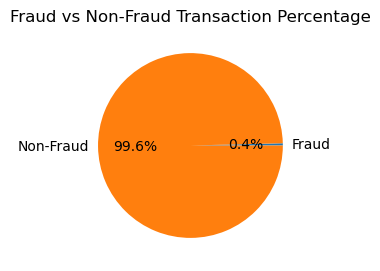

In [19]:
# Count Fraud (1) and Non-Fraud (0)
# Counting the number of fraud and non-fraud transactions
fraud_counts = data['is_fraud'].value_counts()

# Calculate percentages
fraud_percentage = (fraud_counts[1] / len(data)) * 100
non_fraud_percentage = (fraud_counts[0] / len(data)) * 100

# Plotting the pie chart
plt.figure(figsize=(3,3))
plt.pie([fraud_percentage, non_fraud_percentage], labels=['Fraud', 'Non-Fraud'], autopct='%1.1f%%')
plt.title('Fraud vs Non-Fraud Transaction Percentage')
plt.show()


### Gender Distribution Based on Fraud and non fraud detection 

In [20]:

normal = data[data['is_fraud'] == 0] # create the normal transaction dataset

fraud = data[data['is_fraud'] == 1] # create a fruad transaction dataset

### Bar Chart for Normal Transactions and Fraud Transaction based on Gender

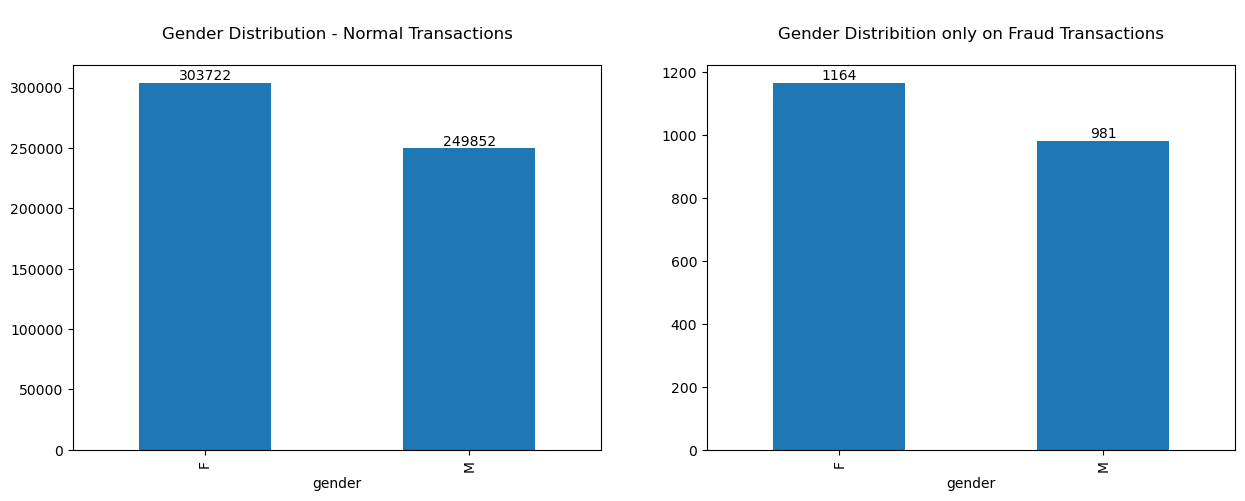

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=[15,5])

#  creates a subplot on the left side (1 row, 2 columns, first plot).
plt.subplot(1,2,1)
# plots the counts of each gender category in the 'gender' column of dataframe normal
normal['gender'].value_counts().plot(kind = 'bar')
plt.title('\nGender Distribution - Normal Transactions\n')


# Annotate the bars with count values
# annotates the bars in the bar chart with their count values
for i, value in enumerate(normal['gender'].value_counts()):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom')

# plot gender count in fraud class
# creates a subplot on the right side (1 row, 2 columns, second plot).
plt.subplot(1,2,2)
# plots the counts of each gender category in the 'gender' column of dataframe fraud
fraud['gender'].value_counts().plot(kind = 'bar')
plt.title('\nGender Distribition only on Fraud Transactions\n');

# Annotate the bars with count values
for i, value in enumerate(fraud['gender'].value_counts()):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom')

### Donut Chart for fraud transactions based on gender

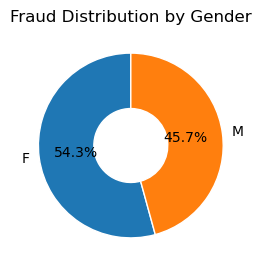

In [22]:
# Count the occurrences of fraud by gender
fraud_by_gender = data.groupby(['gender', 'is_fraud']).size().unstack()

# Plotting the pie chart
plt.figure(figsize=(3,3))

# Selecting the 'is_fraud' column and plotting the donut chart
plt.pie(fraud_by_gender[1], labels=fraud_by_gender.index, autopct='%1.1f%%', startangle=90,
        wedgeprops=dict(width=0.6, edgecolor='w'))  # Set width for the donut effect

plt.title('Fraud Distribution by Gender')
plt.show()

## Top 10 of each column 

### Top 10 cc_num with most Fradulent Transaction 

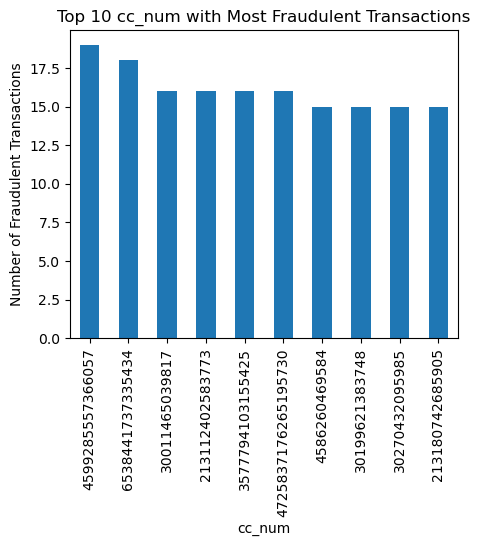

In [23]:
# Grouping by Credit Card Number (cc_num) and Summing Fraudulent Transactions
fraud_count_merch = data.groupby("cc_num")["is_fraud"].sum()
# Selecting the Top 10 Credit Card Numbers with the Most Fraudulent Transactions
top10_merch = fraud_count_merch.nlargest(10)
plt.figure(figsize=(5,4))
top10_merch.plot(kind="bar")
plt.xlabel("cc_num")
plt.ylabel("Number of Fraudulent Transactions")
plt.title("Top 10 cc_num with Most Fraudulent Transactions")
plt.xticks(rotation=90)
plt.show()

### Top 10 Merchants with Most Fradulent Transaction 

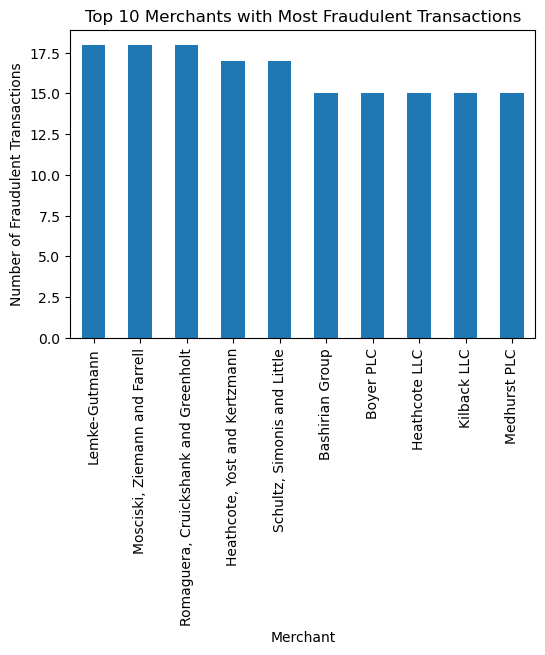

In [24]:
fraud_count_merch = data.groupby("merchant")["is_fraud"].sum()
top10_merch = fraud_count_merch.nlargest(10)
plt.figure(figsize=(6,4))
top10_merch.plot(kind="bar")
plt.xlabel("Merchant")
plt.ylabel("Number of Fraudulent Transactions")
plt.title("Top 10 Merchants with Most Fraudulent Transactions")
plt.xticks(rotation=90)
plt.show()

### Top 10 Categories with Most Fradulent Transactions 

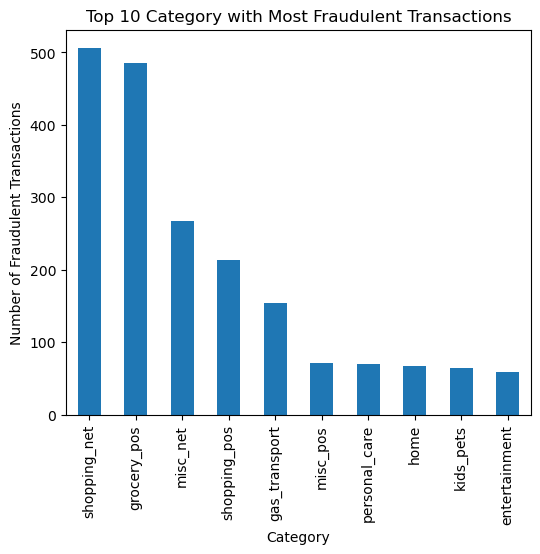

In [25]:
fraud_counts_cat = data.groupby("category")["is_fraud"].sum()
top10_cat = fraud_counts_cat.nlargest(10)
plt.figure(figsize=(6,5))
top10_cat.plot(kind="bar")
plt.xlabel("Category")
plt.ylabel("Number of Fraudulent Transactions")
plt.title("Top 10 Category with Most Fraudulent Transactions")
plt.xticks(rotation=90)
plt.show()

### Top 10 cities with Most Fradulent Transactions 

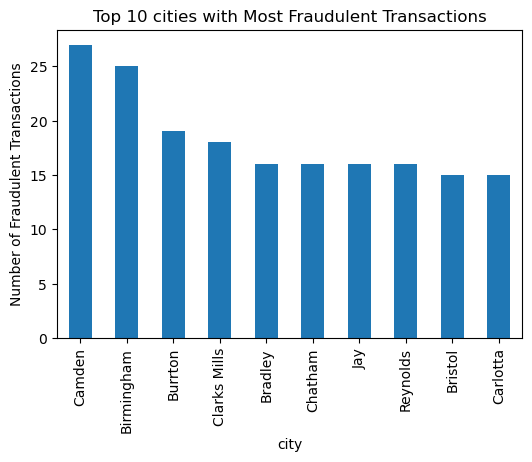

In [26]:
fraud_counts_city = data.groupby("city")["is_fraud"].sum()
plt.figure(figsize=(6,4))
fraud_counts_city.nlargest(10).plot(kind="bar")
plt.xlabel("city")
plt.ylabel("Number of Fraudulent Transactions")
plt.title("Top 10 cities with Most Fraudulent Transactions")
plt.xticks(rotation=90)
plt.show()

### Top 10 Jobs with Most Fradulent Transactions 

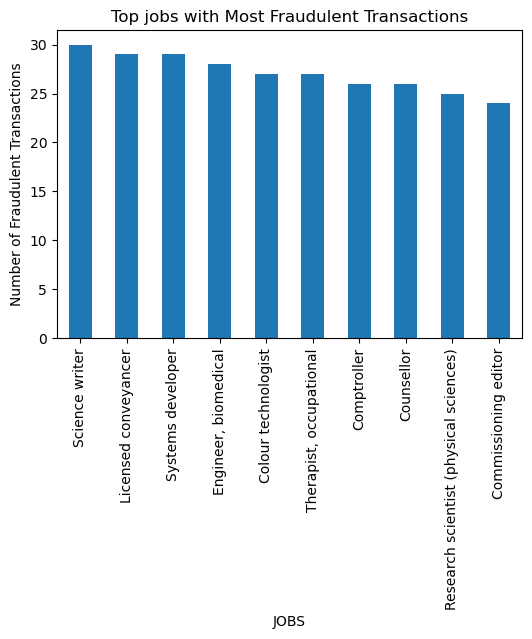

In [27]:
fraud_counts_job = data.groupby("job")["is_fraud"].sum()
top10_job = fraud_counts_job.nlargest(10)

plt.figure(figsize=(6,4))
top10_job.plot(kind="bar")
plt.xlabel("JOBS")
plt.ylabel("Number of Fraudulent Transactions")
plt.title("Top jobs with Most Fraudulent Transactions")
plt.xticks(rotation=90)
plt.show()

## Transaction and age 

### Categorizing Customers into Different Age Groups 

In [28]:
import numpy as np

# Dictionary defining age ranges corresponding to different age groups
age_ranges = {
    "Child": (0, 13),
    "Teen": (13, 20),
    "Adult": (20, 65),
    "Senior": (65, None)}

data["age_group"] = np.where(data["age_cust"] < 13, "Child",np.where(data["age_cust"] < 20, "Teen",
                                            np.where(data["age_cust"] < 55, "Adult", "Senior")))
data["age_group"] = pd.cut(data["age_cust"], bins=[0, 13, 20, 55, 90], labels=["Child", "Teen", "Adult", "Senior"], 
                         include_lowest=True)


### Fradulent Transaction on the Basis of Age 

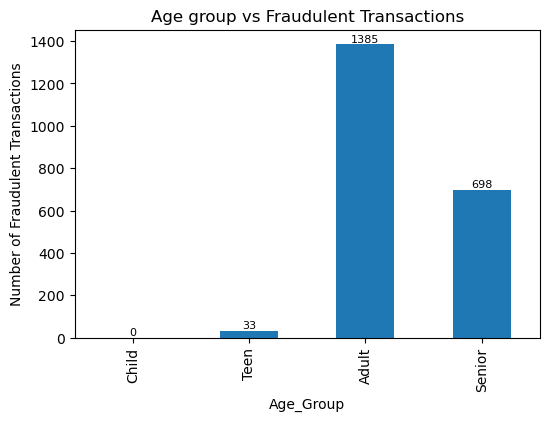

In [29]:
fraud_counts_age = data.groupby("age_group")["is_fraud"].sum()
plt.figure(figsize=(6,4))
ax = fraud_counts_age.plot(kind="bar")
plt.xlabel("Age_Group")
plt.ylabel("Number of Fraudulent Transactions")
plt.title("Age group vs Fraudulent Transactions")
plt.xticks(rotation=90)

# Annotate each bar with its count
for i, v in enumerate(fraud_counts_age):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=8)

plt.show()

###  Visualizing the distribution of customer ages for both fraud and non-fraud transactions using a line plot 

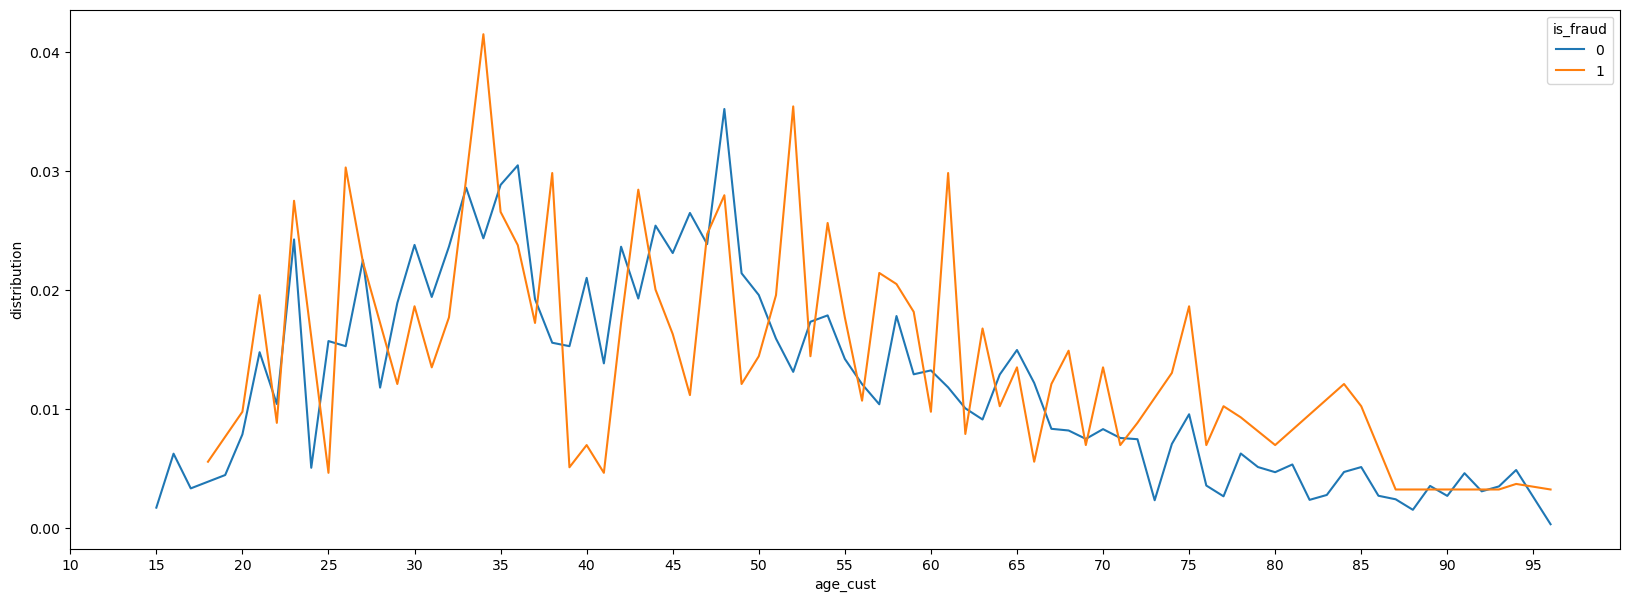

In [30]:
plt.figure(figsize = [20,7])

trans_hour_distribution = data.groupby('is_fraud')['age_cust'].value_counts(normalize = True).rename('distribution').reset_index() # count by customer age

sns.lineplot(data = trans_hour_distribution, x = 'age_cust', y = 'distribution', hue = 'is_fraud') # plotting the line plot with hue = class

plt.xticks(np.arange(10,100,5)); # modifying the xticks

#stats_by_class('cust_age') # calling the stats by class function for cust_age varaible

### Transaction and Time 

### visualizing the number of fraudulent and non-fraudulent transactions by hour and gender using line plots 

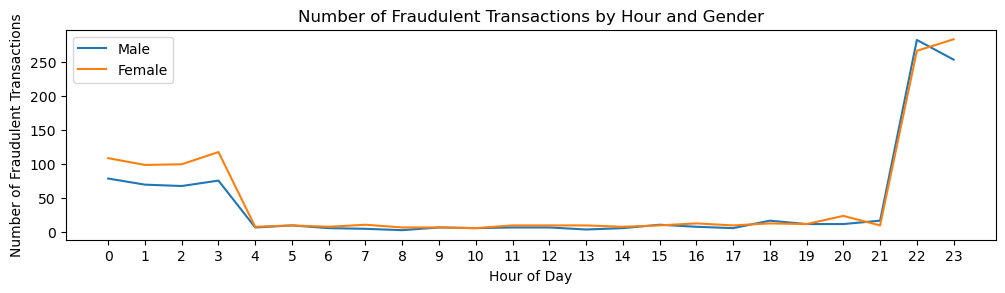

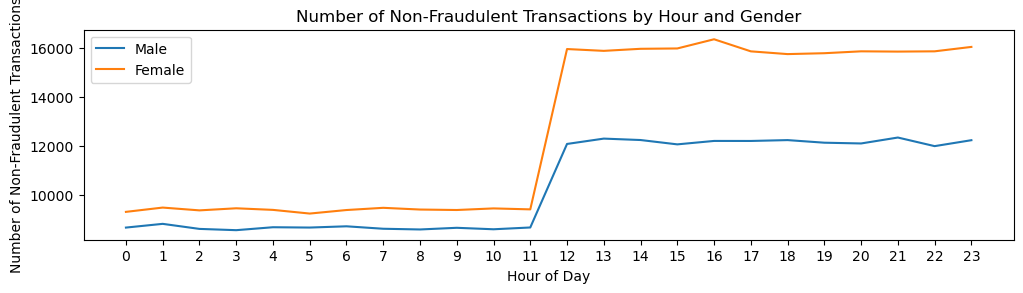

In [31]:

hourly_fraud_male = fraud[fraud['gender'] == 'M'].groupby('hour').size()
hourly_fraud_female = fraud[fraud['gender'] == 'F'].groupby('hour').size()

plt.figure(figsize=(12, 6))
plt.subplot(2,1,1)
plt.plot(hourly_fraud_male.index, hourly_fraud_male.values, label='Male')
plt.plot(hourly_fraud_female.index, hourly_fraud_female.values, label='Female')

plt.title('Number of Fraudulent Transactions by Hour and Gender')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Fraudulent Transactions')
plt.xticks(range(0, 24))  # because we have a 24 hr format
plt.legend()
plt.show()

hourly_non_fraud_male = normal[normal['gender'] == 'M'].groupby('hour').size()
hourly_non_fraud_female = normal[normal['gender'] == 'F'].groupby('hour').size()

plt.figure(figsize=(12, 6))
plt.subplot(2,1,2)
plt.plot(hourly_non_fraud_male.index, hourly_non_fraud_male.values, label='Male')
plt.plot(hourly_non_fraud_female.index, hourly_non_fraud_female.values, label='Female')

plt.title('Number of Non-Fraudulent Transactions by Hour and Gender')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Non-Fraudulent Transactions')
plt.xticks(range(0, 24))  #because we have a 24 hour format
plt.legend()

plt.show()


###  Fraud transactions by month using both a line plot and a bar plot for visualization 

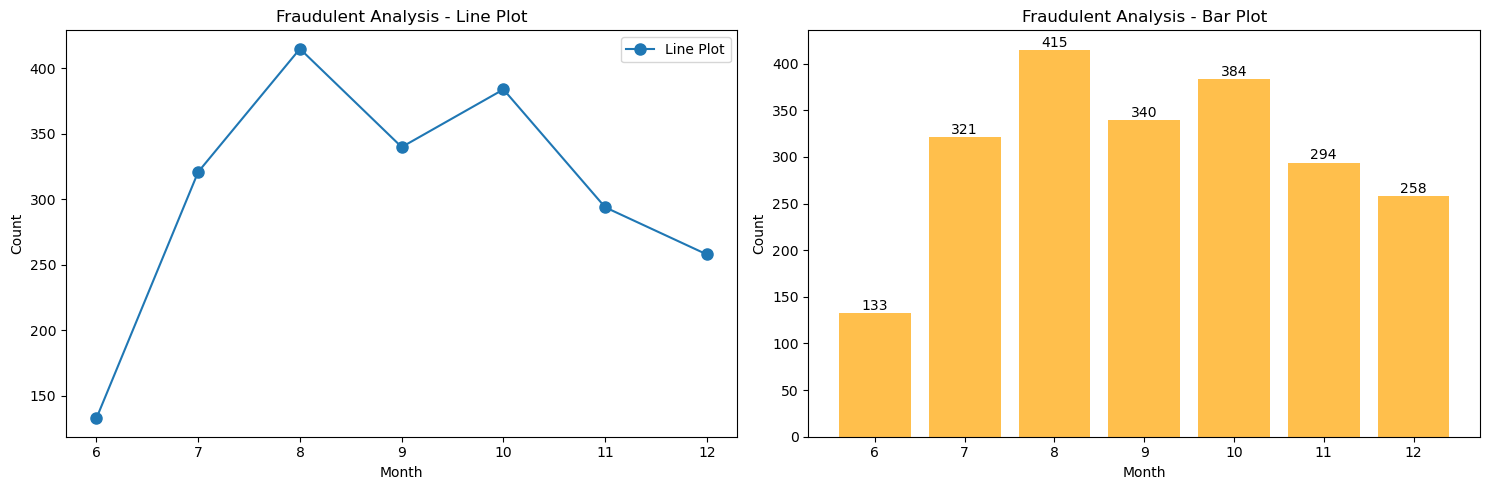

In [32]:
# Selecting data for fraud transactions
fraudulent_data = data[data['is_fraud'] == 1]

# Counting fraud occurrences by month and sorting by index
fraud_counts_by_month = fraudulent_data['month'].value_counts().sort_index()

# Set the size of the figure
plt.figure(figsize=(15, 5))

# Plotting the line plot with markers in the first subplot
plt.subplot(1, 2, 1)
plt.plot(fraud_counts_by_month.index, fraud_counts_by_month, marker='o', linestyle='-', markersize=8, label='Line Plot')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Fraudulent Analysis - Line Plot')
plt.legend()

# Plotting the bar plot with annotations in the second subplot
plt.subplot(1, 2, 2)
bars = plt.bar(fraud_counts_by_month.index, fraud_counts_by_month, color='orange', alpha=0.7, label='Bar Plot')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Fraudulent Analysis - Bar Plot')

# Annotating each bar with count values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.1, round(yval, 1), ha='center', va='bottom')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


###  Fraud transactions by hour using both a line plot and a bar plot for visualization 

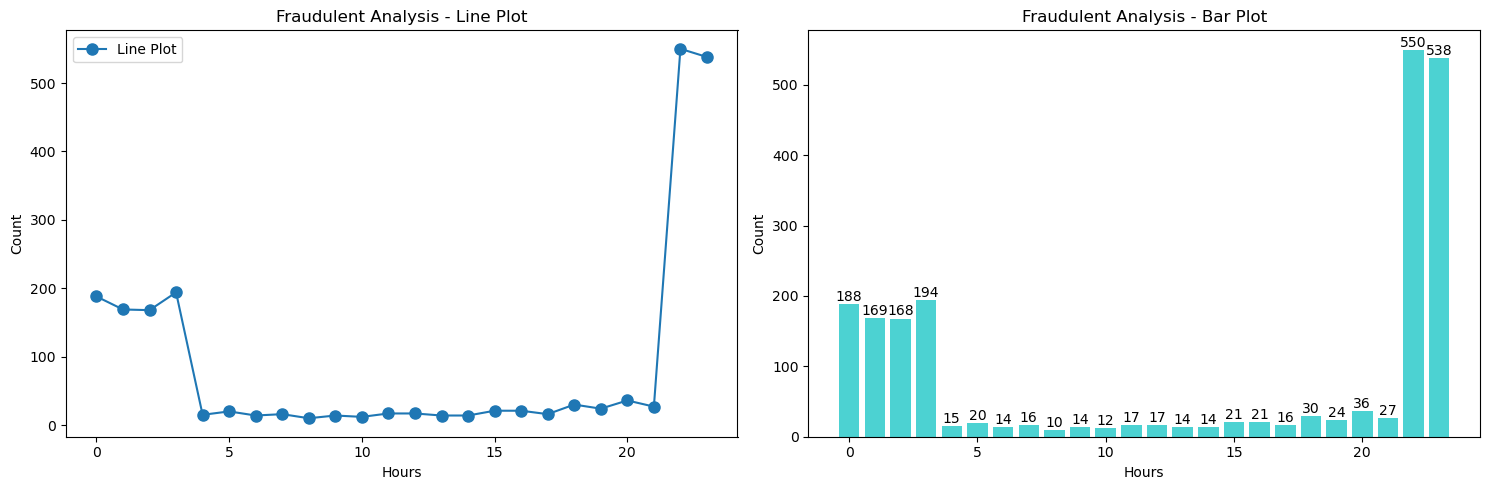

In [33]:
# Selecting data for fraud transactions
fraudulent_data = data[data['is_fraud'] == 1]

# Counting fraud occurrences by hours and sorting by index
fraud_counts_by_hours = fraudulent_data['hour'].value_counts().sort_index()

# Set the size of the figure
plt.figure(figsize=(15, 5))

# Plotting the line plot with markers in the first subplot
plt.subplot(1, 2, 1)
plt.plot(fraud_counts_by_hours.index, fraud_counts_by_hours, marker='o', linestyle='-', markersize=8, label='Line Plot')
plt.xlabel('Hours')
plt.ylabel('Count')
plt.title('Fraudulent Analysis - Line Plot')
plt.legend()

# Plotting the bar plot with annotations in the second subplot
plt.subplot(1, 2, 2)
bars = plt.bar(fraud_counts_by_hours.index, fraud_counts_by_hours, color='c', alpha=0.7, label='Bar Plot')
plt.xlabel('Hours')
plt.ylabel('Count')
plt.title('Fraudulent Analysis - Bar Plot')

# Annotating each bar with count values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.1, round(yval, 1), ha='center', va='bottom')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


###  Fraud transactions by days of week using both a line plot and a bar plot for visualization

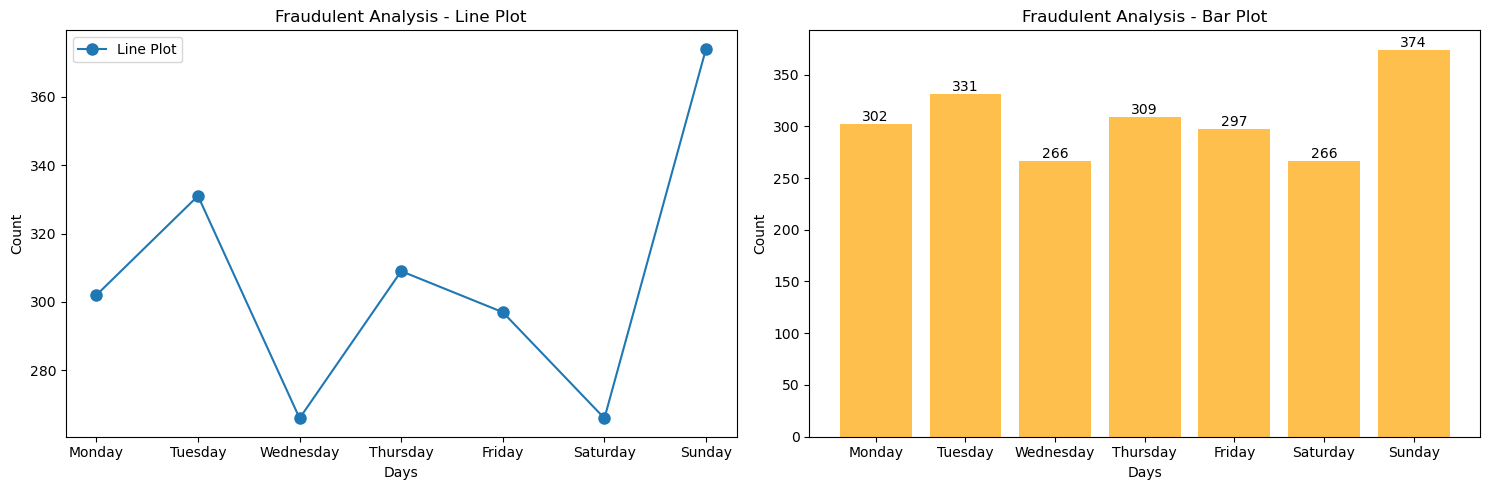

In [34]:
# Selecting data for fraud transactions
fraudulent_data = data[data['is_fraud'] == 1]

# Counting fraud occurrences by days and sorting by index (Monday to Sunday)
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
fraud_counts_by_days = fraudulent_data['day'].value_counts().sort_index().reindex(days_order)

# Set the size of the figure
plt.figure(figsize=(15, 5))

# Plotting the line plot with markers in the first subplot
plt.subplot(1, 2, 1)
plt.plot(fraud_counts_by_days.index, fraud_counts_by_days, marker='o', linestyle='-', markersize=8, label='Line Plot')
plt.xlabel('Days')
plt.ylabel('Count')
plt.title('Fraudulent Analysis - Line Plot')
plt.legend()

# Plotting the bar plot with annotations in the second subplot
plt.subplot(1, 2, 2)
bars = plt.bar(fraud_counts_by_days.index, fraud_counts_by_days, color='orange', alpha=0.7, label='Bar Plot')
plt.xlabel('Days')
plt.ylabel('Count')
plt.title('Fraudulent Analysis - Bar Plot')

# Annotating each bar with count values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.1, round(yval, 1), ha='center', va='bottom')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


## Feature Engineering 

Two categorical variables, 'category' and 'job', are encoded using LabelEncoder.
For each variable, the fit_transform() method of LabelEncoder is called to fit the encoder to the unique categories in the variable and transform the categories into numerical labels.

In [35]:

from sklearn.preprocessing import LabelEncoder

# Encode categorical variable using LabelEncoder
label_encoder = LabelEncoder()
data['category'] = label_encoder.fit_transform(data['category'])
data['job'] = label_encoder.fit_transform(data['job'])

In [36]:
data["gender"] = data["gender"].replace({"M": 1, "F": 0})

In [37]:
data.drop(columns=['trans_date_trans_time','cc_num','merchant','city','state', 'lat_dist', 'long_dist'],inplace=True)
data.drop(columns=['zip', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long', 'day', 'month', 'age_group'],inplace=True)


In [38]:

data.head()

,category,amt,gender,job,is_fraud,hour,age_cust
0,10,2.86,1,275,0,12,52
1,10,29.84,0,392,0,12,30
2,5,41.28,0,259,0,12,50
3,9,60.05,1,407,0,12,33
4,13,3.19,1,196,0,12,65


### Model Implementation and Evauation 

In [39]:
# Features /Input/
X = data.drop(["is_fraud"], axis = 1)
# Target Variable
y = data["is_fraud"]

### Splitting the Dataset into Training and Testing Sets 

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Logistic Regression 

Logistic regression is a statistical method used for binary classification problems, where the goal is to predict the probability of one of two possible outcomes. It is widely used in machine learning and statistics for tasks such as spam detection, medical diagnosis, and credit scoring.

In [41]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [42]:
# training the Logistic Regression Model with Training Data
model.fit(X_train, y_train)

C:\Users\PMLS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Accuracy Score

The proportion of correctly predicted instances (both true positives and true negatives) out of the total instances.

### For Training Data

In [43]:
from sklearn.metrics import accuracy_score
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)

In [44]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9958342236967891


### For Testing Data

In [45]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)

In [46]:
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.9958522277405888


# Random Forest Classifier

1. Random forest is a machine learning algorithm.
2. It combines the output of multiple decision trees to reach a single result.
3. It can be used to solve for regression or classification problems.
4. It is used for making predictions about continuous values.
5. Particularly useful for enhancing the accuracy of the predictions.

In [47]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

rs = RandomForestClassifier()
rs.fit(X_train,y_train)
y_pred = rs.predict(X_test)
# Evaluate the model
accuracy = rs.score(X_test, y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")


Accuracy: 99.88%
Mean Squared Error (MSE): 0.0011876484560570072
Mean Absolute Error (MAE): 0.0011876484560570072


Confusion Matrix:
[[110700     18]
 [   114    312]]


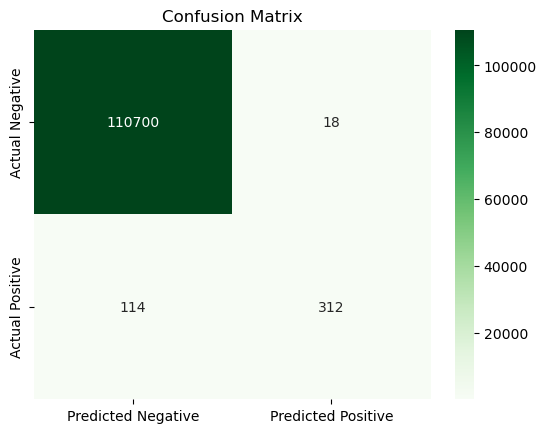

In [48]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are the true and predicted labels, respectively
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
print("Confusion Matrix:")
print(cm)

# Create a heatmap for better visualization
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", 
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix')
plt.show()


# Decision Tree Classifier

1. A decision tree is a non-parametric supervised learning algrithm, which is utilized for both classification and regression tasks.
2. The goal is to create a model that predicts the value of a target variable.
3. Decision trees are used to solve classification problems and categorize objects depending on their learning feature

In [49]:
Dtree=DecisionTreeClassifier(random_state=0,criterion='entropy',splitter="best")
# Train the model on the training set
Dtree.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dtree = Dtree.predict(X_test)

# Evaluate the model
accuracy = Dtree.score(X_test, y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred_dtree)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_dtree)
print(f"Mean Absolute Error (MAE): {mae}")


Accuracy: 99.84%
Mean Squared Error (MSE): 0.0016285179586842296
Mean Absolute Error (MAE): 0.0016285179586842296


Confusion Matrix:
[[110616    102]
 [    79    347]]


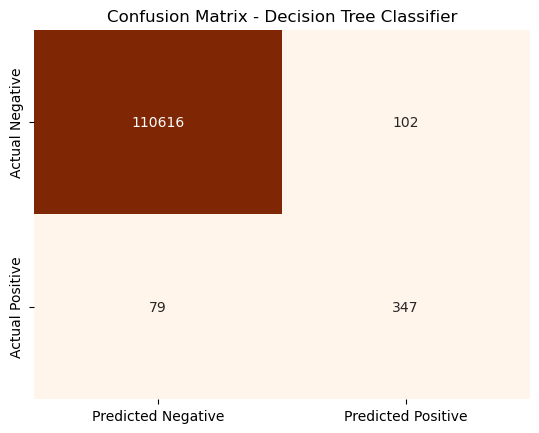

In [50]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test and y_pred_dtree are the true and predicted labels, respectively
cm_dtree = confusion_matrix(y_test, y_pred_dtree)

# Display the confusion matrix
print("Confusion Matrix:")
print(cm_dtree)

# Create a heatmap for better visualization
sns.heatmap(cm_dtree, annot=True, fmt="d", cmap="Oranges", cbar=False, 
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix - Decision Tree Classifier')
plt.show()
